In [1]:
import numpy as np
from vae.arch import VAE
import matplotlib.pyplot as plt
batch_num = 0

/Users/davidfoster/.virtualenvs/worldmodels/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
vae = VAE()
vae.set_weights('./vae/weights.h5')

In [4]:
obs_data = np.load('./data/obs_data_car_racing_' + str(batch_num) + '.npy') 
action_data = np.load('./data/action_data_car_racing_' + str(batch_num) + '.npy')

In [5]:
rnn_input = []
rnn_output = []

for i, j in zip(obs_data, action_data):    
    rnn_z_input = vae.encoder.predict(np.array(i))
    conc = [np.concatenate([x,y]) for x, y in zip(rnn_z_input, j)]
    rnn_input.append(conc[:-1])
    rnn_output.append(np.array(rnn_z_input[1:]))

rnn_input = np.array(rnn_input)
rnn_output = np.array(rnn_output)


In [6]:
rnn_input[0].shape

(299, 35)

In [7]:
rnn_output[0].shape

(299, 32)

[ 0.58229768  0.25766134 -0.79250759  0.71792901  1.18304849  1.3437984
  1.02877092  1.41141474 -1.0233041  -0.49278203  0.1857858  -1.95254922
  0.52788365  0.28571907  1.13091195  0.51232487 -0.23121178  0.97015071
  0.83288229 -2.33697128  0.78550142  1.78365397 -1.53190482  0.3010416
  0.59640712  0.4919143   0.08068101 -0.5720607   0.2780323  -0.00769144
  1.17378628 -1.21362507  0.          1.          0.        ]


<function matplotlib.pyplot.show>

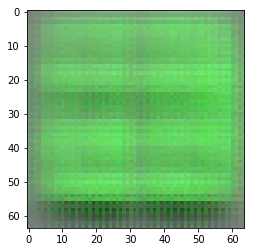

In [8]:
i_0 = rnn_input[0][0]
print(i_0)
z_decoded = vae.decoder.predict(np.array([i_0[:32]]))[0]
plt.imshow(z_decoded)
plt.show

In [11]:
z_decoded
# np.concatenate([z_decoded, [0,0,0]])
# input_to_rnn = [np.array([[np.concatenate([z_decoded, [0,0,0]])]]),np.array([[0]*256]),np.array([[0]*256])]


array([[[0.4956437 , 0.52518845, 0.4959117 ],
        [0.5015323 , 0.5271348 , 0.49683902],
        [0.48290804, 0.5422099 , 0.47808504],
        ...,
        [0.47341654, 0.59159404, 0.49444702],
        [0.4910646 , 0.560641  , 0.51015955],
        [0.48230958, 0.5711971 , 0.4912304 ]],

       [[0.48749143, 0.5241197 , 0.48471636],
        [0.48844597, 0.5131972 , 0.4804253 ],
        [0.4774548 , 0.54349214, 0.47650915],
        ...,
        [0.49113238, 0.5783312 , 0.49614668],
        [0.4839532 , 0.5541487 , 0.4852935 ],
        [0.47065452, 0.5488209 , 0.4881057 ]],

       [[0.504482  , 0.53502154, 0.5074422 ],
        [0.4971001 , 0.53769386, 0.4728374 ],
        [0.5125409 , 0.5535868 , 0.49376085],
        ...,
        [0.49226308, 0.6404846 , 0.48066673],
        [0.48140714, 0.5709334 , 0.48918176],
        [0.47578958, 0.61634064, 0.5090695 ]],

       ...,

       [[0.46142516, 0.49789804, 0.4774396 ],
        [0.45749593, 0.48500255, 0.47070897],
        [0.43888727, 0

[ 1.24808347 -0.42198122  1.92960072 -0.58700997  1.35638559 -0.75876993
 -0.40237588 -0.8754251  -0.68930155  0.02570416  0.00727779  0.62824464
 -1.72872758 -0.47261941  0.5808242  -0.20029776 -1.28565407  0.23638006
  1.24150085 -0.11230274 -0.72153425 -0.11570223  0.01621676  1.07412481
  0.91359973  1.36564362 -1.72818708  3.2546587  -0.12320919  1.7373867
  0.77772522 -0.49459291  0.          1.          0.        ]


<function matplotlib.pyplot.show>

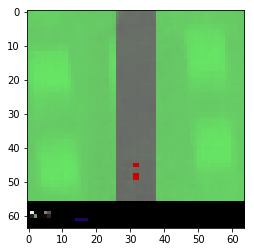

In [25]:
i_1 = rnn_input[0][1]
print(i_1)
z_decoded = vae.decoder.predict(np.array([i_1[:32]]))[0]
plt.imshow(z_decoded)
plt.show

[-5.4200e-02 -5.0680e-01  1.3051e+00  1.2201e+00  3.1060e-01  5.7120e-01
  1.0284e+00 -2.5370e-01  7.1400e-01  6.6200e-02  2.2560e-01  2.6220e-01
 -1.2504e+00 -3.8400e-02 -1.3803e+00 -1.0000e-03 -7.9490e-01 -3.4830e-01
 -7.6990e-01  3.3290e-01  7.3660e-01  3.4460e-01  9.3360e-01  1.3269e+00
  1.0250e-01  1.9214e+00 -1.4712e+00  1.3349e+00  1.7790e-01 -4.4170e-01
 -1.1622e+00  7.2440e-01  0.0000e+00  1.0000e+00  0.0000e+00]


<function matplotlib.pyplot.show>

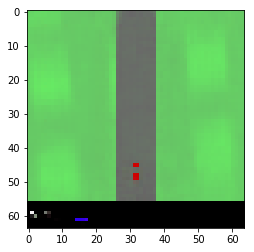

In [27]:
i_2 = rnn_input[0][2]
print(np.round(i_2,4))
z_decoded = vae.decoder.predict(np.array([i_2[:32]]))[0]
plt.imshow(z_decoded)
plt.show

In [29]:
b = np.swapaxes(rnn_input[0],0,1)

In [30]:
b

array([[ 1.53468251,  1.24808347, -0.05421108, ..., -1.13183486,
         0.51109445,  0.53800678],
       [-0.64337611, -0.42198122, -0.50675076, ..., -0.33354229,
        -0.13090487, -0.12550618],
       [ 0.44233939,  1.92960072,  1.30511427, ...,  0.07602269,
        -0.11546367, -1.47665036],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -1.        ,
        -1.        , -1.        ],
       [ 1.        ,  1.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

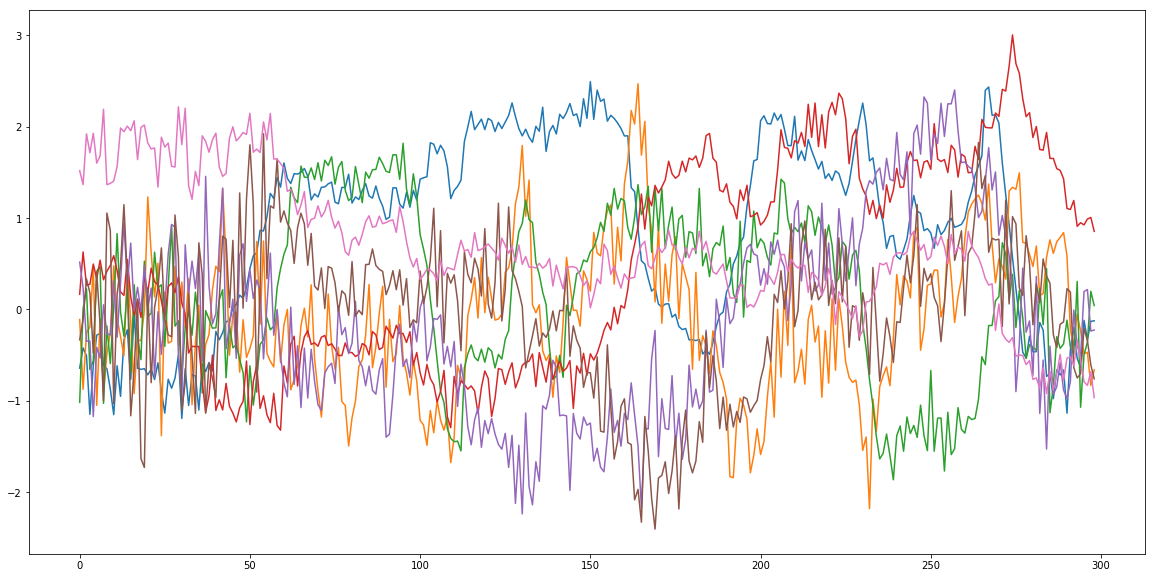

In [80]:
plt.figure(figsize=(20,10))
for i in [1,7,10,11,17,19,25]:
    plt.plot( b[i,:])

